### ISyE524: Intro to Optimization
#### Problem Set #3
##### 1. MaxFlow
###### 1-1


\begin{align*}
\text{Max} \quad & x_{3t} + x_{4t} - x_{ts} \\
\text{Subject to:} \quad & \sum_{j \in N} x_{ij} - \sum_{j \in N} x_{ji} = 0 \quad \forall i \in N \\
& 0 \leq x_{ij} \leq u_{ij} \quad \forall (i, j) \in A 
\end{align*}

###### 1-2

\begin{align*}
\text{Min} \quad & \sum_{(i,j) \in A} \mu_{ij} \lambda_{ij} \\
\text{Subject to:} \quad & \mu_{i} - \mu_{j} + \lambda_{ij} \geq 0 \quad \forall (i,j) \in A \\
& -\mu_{s} + \mu_{t} \geq 1\\
& \mu_{i}   free \quad \forall i \in N \\
& 0 \leq \lambda_{ij} \quad \forall (i, j) \in A 
\end{align*}

###### 1-3

In [77]:
using JuMP
using GLPK

# Create a new model with the GLPK solver
model = Model(GLPK.Optimizer)

# Define the variables for the flow on each arc
@variable(model, x[["s", "1", "2", "3", "4", "t"], ["s", "1", "2", "3", "4", "t"]] >= 0)

# Define the objective function to maximize the flow into t
@objective(model, Max, x["3","t"] + x["4","t"])

# Add capacity constraints
@constraint(model, x["s","1"] <= 6)
@constraint(model, x["s","2"] <= 2)
@constraint(model, x["1","2"] <= 1)
@constraint(model, x["1","3"] <= 3)
@constraint(model, x["3","2"] <= 3)
@constraint(model, x["2","4"] <= 7)
@constraint(model, x["3","t"] <= 2)
@constraint(model, x["4","t"] <= 7)

# Add flow conservation constraints
@constraint(model, x["s","1"] - x["1","2"] - x["1","3"] == 0)
@constraint(model, x["s","2"] + x["1","2"] + x["3","2"] - x["2","4"] == 0)
@constraint(model, x["1","3"] - x["3","2"] - x["3","t"] == 0)
@constraint(model, x["2","4"] - x["4","t"] == 0)

# Solve the model
optimize!(model)

# Output the results
println("The maximum flow from s to t is: ", objective_value(model))
value.(x)

The maximum flow from s to t is: 6.0


2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["s", "1", "2", "3", "4", "t"]
    Dimension 2, ["s", "1", "2", "3", "4", "t"]
And data, a 6×6 Matrix{Float64}:
 0.0  4.0  2.0  0.0  0.0  0.0
 0.0  0.0  1.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  4.0  0.0
 0.0  0.0  1.0  0.0  0.0  2.0
 0.0  0.0  0.0  0.0  0.0  4.0
 0.0  0.0  0.0  0.0  0.0  0.0

###### 1-4

###### 1-5

##### 2. Lasso
###### 2-1

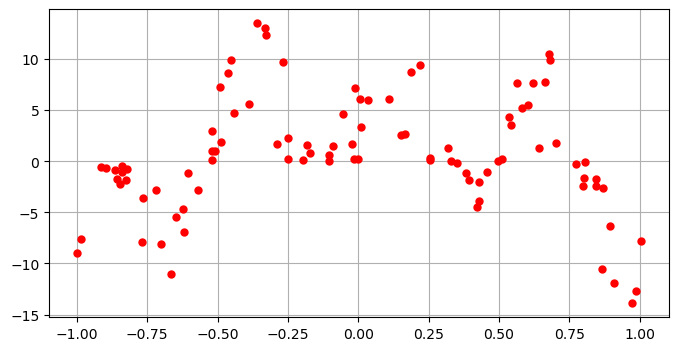

In [1]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso-data.csv", DataFrame)
x = data[:,1]
y = data[:,2]

cla()
figure(figsize=(8,4))
plot(x,y,"r.", markersize=10)
grid("True")
# Only need this in vscode?
display(gcf())

In [2]:
# Fit the data using a function of the form y = f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}

# Order of polynomial used for fitting
k = 6

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

# Solve the LEAST SQUARES polynomial fit

using JuMP, HiGHS
m6 = Model(HiGHS.Optimizer)

@variable(m6, u[1:k+1])
@objective(m6, Min, sum( (y - A*u).^2 ) )

optimize!(m6)
uopt6 = value.(u)
println(termination_status(m6))
println("The error is ", objective_value(m6))
println("The coefficients are ", uopt6)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000681, 3073.967606, 7
3, 0.000782, 1607.360992, 7
Model   status      : Optimal
Objective value     :  1.6073609922e+03
HiGHS run time      :          0.00
OPTIMAL
The error is 1607.3609921595705
The coefficients are [-2.249371900396229, -41.30577606533521, -8.493550837855988, 43.82460620435696, -1.8469776466959757, -8.539113160802808, 3.375813786151018]


###### 2-2

In [3]:
# Fit the data using a function of the form y = f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}

# Order of polynomial used for fitting
k = 18

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

# Solve the LEAST SQUARES polynomial fit

using JuMP, HiGHS
m18 = Model(HiGHS.Optimizer)

@variable(m18, u[1:k+1])
@objective(m18, Min, sum( (y - A*u).^2 ) )

optimize!(m18)
uopt18 = value.(u)
println(termination_status(m18))
println("The error is ", objective_value(m18))
println("The coefficients are ", uopt18)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000428, 3073.967606, 19
3, 0.000708, 522.039311, 19
Model   status      : Optimal
Objective value     :  5.2203999098e+02
HiGHS run time      :          0.00
OPTIMAL
The error is 522.0399909810724
The coefficients are [-85777.96987569737, -34190.35284858116, 391618.11446229444, 145410.400856986, -743933.078416506, -248442.9827777201, 761790.0455611285, 214415.78339220045, -455126.1937070716, -93662.63157967123, 160101.09152807322, 15385.569783950783, -31648.88748634598, 1765.1586151727297, 3070.4161891439185, -713.8251991827888, -106.44740057256564, 33.180843520283986, 3.92627202618853]


###### 2-3

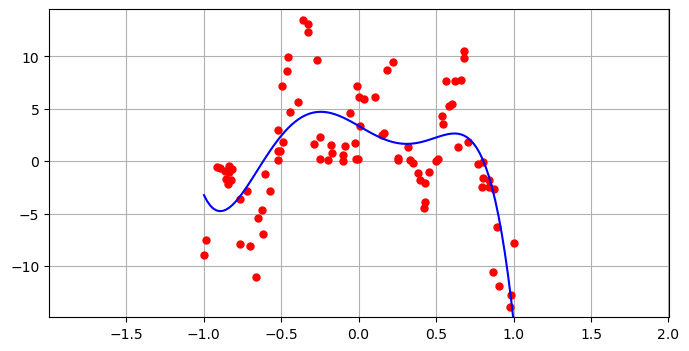

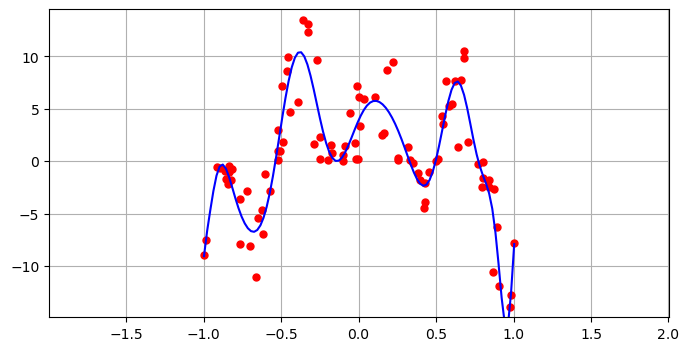

In [4]:
using PyPlot, LinearAlgebra
function plotwregsol(x,y,usol)

    minx = minimum(x)
    maxx = maximum(x)
    miny = minimum(y)
    maxy = maximum(y)   

    # Make (npts,k+1) matrix containing polynomial term values at plot points.  Fancy matrix stuff.
    npts = 100
    xfine = range(minx,stop=maxx,length=npts)
    ffine = ones(npts)
    for j = 1:k
        ffine = [ffine.*xfine ones(npts)]
    end

    # Compute the estimate values
    yfine = ffine * usol

    # Plot 'em
    figure(figsize=(8,4))
    plot(x,y,"r.", markersize=10)
    plot( xfine, yfine, "b-")

    axis([minx-1,maxx+1,miny-1,maxy+1])

    grid()
    display(gcf())
end
k = 6
plotwregsol(x,y,uopt6)
k = 18
plotwregsol(x,y,uopt18)

###### 2-4

In [10]:
# Fit the data using a function of the form y = f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}

# Order of polynomial used for fitting
k = 18

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

# Solve the LEAST SQUARES polynomial fit

using JuMP, Ipopt
function solveOpt(λ)
    m18 = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

    @variable(m18, u[1:k+1])
    @objective(m18, Min, sum( (y - A*u).^2 ) + λ*sum(abs.(u)))

    optimize!(m18)
    uopt18 = value.(u)
return objective_value(m18), uopt18
end

solveOpt (generic function with 1 method)

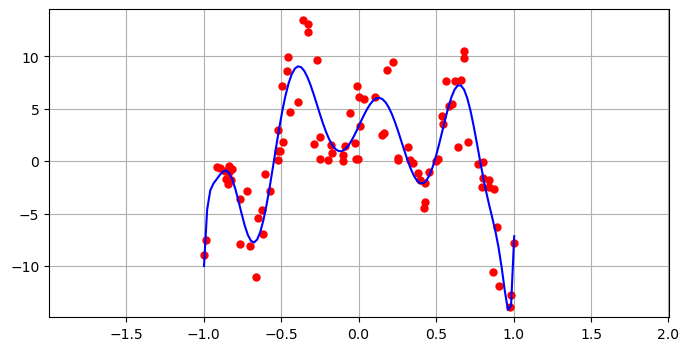

Found a model with at most 6 positive coefficients:
λ = 0.0009770099572992256
Coefficients: [172.32262193616214, 4431.642491268305, -285.6007332003666, -8457.252293122174, 107.04322484865435, 5.000856481610462, 125.62062630893767, 6360.1726852452575, -340.6203942606242, 2094.0633406580027, 260.8876658273223, -8104.827862479913, 12.372785346559446, 4442.093700776393, -77.16137815282191, -802.103877988376, 11.844529333966822, 31.884915154430605, 3.3359575650099598]
Error: 601.2105664386189


In [23]:
λ_values = [i for i in 10 .^(range(-4, stop=10, length=100))]  
results = [(λ, solveOpt(λ)) for λ in λ_values]

# at most 6 postitve coefficients
for (λ, (m18, uopt18)) in results
    if count(x -> x > 0.0001, uopt18) <= 6
        println("Found a model with at most 6 positive coefficients:")
        println("λ = ", λ)
        println("Coefficients: ", uopt18)
        println("Error: ", m18)
        # Plotting the results
        plotwregsol(x,y,uopt18)
        break
    end
end

##### 3. Beam Me Up
###### 3-1

\begin{align*}
\text{Max} \quad & \sum_{r \in T} \tau_{r} - \lambda \sum_{r \in N} \Delta_{r} \\
\text{Subject to:} \quad & \tau_{r} = \sum_{b \in B} a_{br} x_{b}  \quad \forall r \in T \\
\quad & 0 \leq \Delta_{r} \quad \forall r \in N \\
\quad & \sum_{b \in B} (a_{br} x_{b} - p_{r}) \leq \Delta_{r} \quad \forall r \in N \\
& 0 \leq x_{b} \leq W_{b} \quad \forall b \in B 
\end{align*}

###### 3-2

In [42]:
using JuMP
using Ipopt

function solveOpt(λ)
  # Model
  model = Model(Ipopt.Optimizer)

  # Data
  beam_intensity = [
    15 7 8 12 12 6;
    13 4 12 19 15 14;
    9 8 13 13 10 17;
    4 12 12 6 18 16;
    9 4 11 13 6 14;
    8 7 7 10 10 10
  ]

  W_b = 3  # Maximum weight for each beam
  pr = 65  # Upper bound of the dose for normal regions

  # Decision variables
  @variable(model, x[1:6] >= 0)

  # Objective function
  @objective(model, Max, sum(x .* beam_intensity[:, 4:6]) - λ * sum(max.(0, sum(x .* beam_intensity[:, 1:3]) - pr)))

  # Constraints
  for i in 1:6
    @constraint(model, x[i] <= W_b)
  end

  # Solving the model
  set_silent(model)
  optimize!(model)

  return value.(x), sum(value.(x) .* sum(beam_intensity[:, 4:6], dims=1)), sum(max.(0, sum(value.(x) .* beam_intensity[:, 1:3], dims=1) .- pr))
end

x, T, N = solveOpt(1)
println("Total tumor dose: ", T)
println("Total normal tissue dose: ", N)

Total tumor dose: 3336.3558114953257
Total normal tissue dose: 206.89898190546643


###### 3-3

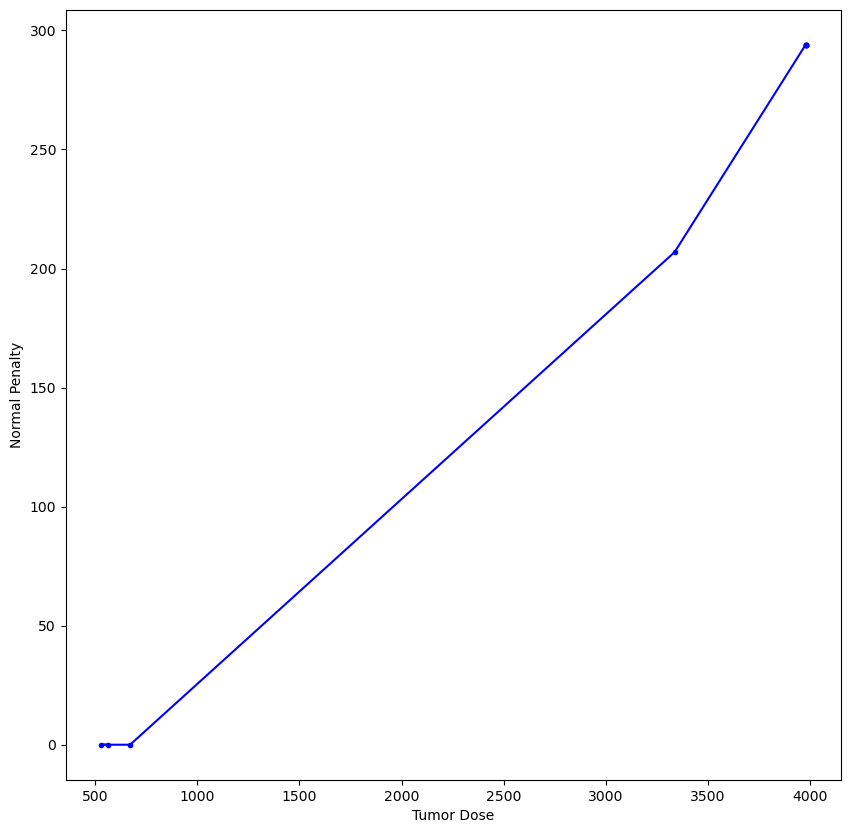

10-element Vector{Tuple{Float64, Tuple{Vector{Float64}, Float64, Float64}}}:
 (0.0001, ([3.000000029969694, 3.0000000299810594, 3.000000029977271, 3.000000029977271, 3.0000000299724494, 3.0000000299696947], 3978.0000397462836, 294.0000048858953))
 (0.00046415888336127773, ([3.000000029916431, 3.000000029947779, 3.0000000299373304, 3.0000000299373317, 3.000000029924038, 3.0000000299164413], 3978.000039687037, 294.0000048786823))
 (0.0021544346900318843, ([3.0000000299162894, 3.0000000299477256, 3.000000029937251, 3.0000000299372576, 3.000000029923944, 3.0000000299163374], 3978.000039686916, 294.0000048786676))
 (0.010000000000000002, ([3.000000029915626, 3.000000029947476, 3.0000000299368788, 3.0000000299369107, 3.0000000299235072, 3.0000000299158525], 3978.000039686352, 294.0000048785984))
 (0.046415888336127795, ([3.0000000299124037, 3.0000000299462872, 3.0000000299350926, 3.0000000299352485, 3.0000000299214102, 3.0000000299135263], 3978.000039683637, 294.0000048782656))
 (0.215443469

In [59]:
using PyPlot

λ_values = [i for i in 10 .^(range(-4, stop=2, length=10))]  
results = [(λ, solveOpt(λ)) for λ in λ_values]

function paretoPlot(x,y)
    figure(figsize=(10,10))
    plot( x, y, "b.-", markersize=6 )
    xlabel("Tumor Dose")
    ylabel("Normal Penalty")
    # Only need this in vscode?
    display(gcf())
end
;
T_values = [result[2][2] for result in results]
N_values = [result[2][3] for result in results]
paretoPlot(T_values, N_values)
# results

##### 4. Nonconvex QP
###### 4-1

In [63]:
using LinearAlgebra

Q = [
    0  0 -2 -4  0  1;
    0  1 -1 -1  3 -4;
   -2 -1 -1 -5  7 -4;
   -4 -1 -5 -3  7 -2;
    0  3  7  7 -1 -2;
    1 -4 -4 -2 -2  0
]
eigenvalues = eigen(Q).values
eigenvectors = eigen(Q).vectors
eigen(Q)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 -16.119094460644884
  -3.756648129364134
  -0.5922928569671964
   2.2331144580905455
   3.845741541835814
  10.389179447049864
vectors:
6×6 Matrix{Float64}:
 -0.198724  -0.344542   0.738114    0.2365      0.432512   0.232352
 -0.197556   0.483214  -0.0898227   0.758158    0.204959  -0.320306
 -0.522407   0.129558  -0.0555954  -0.537552    0.483022  -0.430049
 -0.582895  -0.202886   0.218806    0.0794594  -0.701825  -0.268928
  0.528041   0.198591   0.537884   -0.146579   -0.11575   -0.59794
 -0.173138   0.741895   0.326854   -0.229135   -0.177927   0.478142

###### 4-2

In [87]:
using HiGHS, JuMP

c = [-1, 0, 2, -2, 4, 0]

model = Model(HiGHS.Optimizer)

# Define the decision variables with box constraints
@variable(model, 0 <= x[1:6] <= 1)

# Define the objective function
@objective(model, Min, x' * Q * x + c' * x)

# Attempt to solve the model
optimize!(model)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
ERROR:   Hessian has 3 diagonal entries in [-6, 0) so is not positive semidefinite for minimization
ERROR:   Cannot solve non-convex QP problems with HiGHS
Model   status      : Not Set
HiGHS run time      :          0.00


###### 4-3

In [89]:
eigen(Q - eigenvalues[1] * I)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 -1.4210854715202004e-14
 12.36244633128075
 15.526801603677686
 18.35220891873542
 19.964836002480677
 26.508273907694758
vectors:
6×6 Matrix{Float64}:
 -0.198724  -0.344542   0.738114    0.2365      0.432512   0.232352
 -0.197556   0.483214  -0.0898227   0.758158    0.204959  -0.320306
 -0.522407   0.129558  -0.0555954  -0.537552    0.483022  -0.430049
 -0.582895  -0.202886   0.218806    0.0794594  -0.701825  -0.268928
  0.528041   0.198591   0.537884   -0.146579   -0.11575   -0.59794
 -0.173138   0.741895   0.326854   -0.229135   -0.177927   0.478142

###### 4-4

In [91]:
using HiGHS, JuMP

c = [-1, 0, 2, -2, 4, 0]

model = Model(HiGHS.Optimizer)

# Define the decision variables with box constraints
@variable(model, 0 <= x[1:6] <= 1)

# Define the objective function
@objective(model, Min, x' * (Q - eigen(Q).values[1] * I) * x + c' * x)

# Attempt to solve the model
optimize!(model)
x_k = value.(x)
println("Solution: ", x_k)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000405, 0.000000, 0
9, 0.000578, -0.121812, 4
Model   status      : Optimal
Objective value     : -1.2181234180e-01
HiGHS run time      :          0.00
Solution: [0.053804198404868005, 0.007970204650426211, 0.0, 0.09485606161023015, 0.0, 0.010402593139239085]


##### 5. Pod Racing Rendezvous
###### 5-1

In [19]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer) 

@variable(m, x_a[1:2,1:60])  # position at each time
@variable(m, v_a[1:2,1:60])  # velocity at each time
@variable(m, u_a[1:2,1:60])  # thruster input at each time
@variable(m, x_p[1:2,1:60])  # position at each time
@variable(m, v_p[1:2,1:60])  # velocity at each time
@variable(m, u_p[1:2,1:60])  # thruster input at each time
# satisfy the dynamics (with zero initial velocity)
# Note the use of '.' form of constraints, to make the constraints hold for each component of the vector 

@constraint(m, v_a[:,1] .== [0;20])
@constraint(m, x_a[:,1] .== [0;0])
@constraint(m, v_p[:,1] .== [30;0])
@constraint(m, x_p[:,1] .== [0.5;0])
# model system dynamics
for t in 1:59
    @constraint(m, x_a[:,t+1] .== x_a[:,t] + v_a[:,t])
    @constraint(m, v_a[:,t+1] .== v_a[:,t] + u_a[:,t])
    @constraint(m, x_p[:,t+1] .== x_p[:,t] + v_p[:,t])
    @constraint(m, v_p[:,t+1] .== v_p[:,t] + u_p[:,t])
end

# hit all the checkpoints
@constraint(m, x_a[:,60] .== x_p[:,60])

# minimize 2-norm (squared) of acceleration
@objective(m, Min, sum(u_a.^2)+sum(u_p.^2))
optimize!(m)
value.(x_a[:,60])

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.002143, 6590.500000, 238
481, 0.076537, 33.921310, 238
Model   status      : Optimal
Objective value     :  3.3921310450e+01
HiGHS run time      :          0.08


2-element Vector{Float64}:
 885.2500000095627
 590.0000000063698

###### 5-2

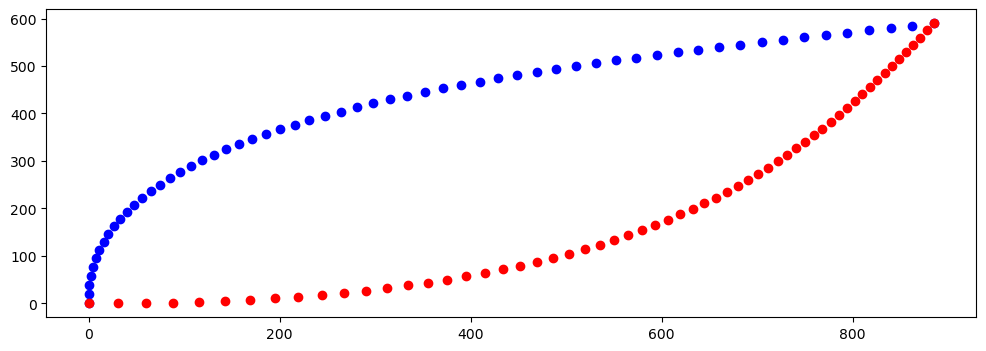

In [20]:
a_opt = value.(x_a)
p_opt = value.(x_p)
# plot the solution against the checkpoints
using PyPlot
figure(figsize=(12,4))
plot( a_opt[1,:], a_opt[2,:], "b.", markersize=12 )
plot( p_opt[1,:], p_opt[2,:], "r.", markersize=12 )
# Only need this in vscode?
display(gcf())

###### 5-3

In [21]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer) 

@variable(m, x_a[1:2,1:60])  # position at each time
@variable(m, v_a[1:2,1:60])  # velocity at each time
@variable(m, u_a[1:2,1:60])  # thruster input at each time
@variable(m, x_p[1:2,1:60])  # position at each time
@variable(m, v_p[1:2,1:60])  # velocity at each time
@variable(m, u_p[1:2,1:60])  # thruster input at each time
# satisfy the dynamics (with zero initial velocity)
# Note the use of '.' form of constraints, to make the constraints hold for each component of the vector 

@constraint(m, v_a[:,1] .== [0;20])
@constraint(m, x_a[:,1] .== [0;0])
@constraint(m, v_p[:,1] .== [30;0])
@constraint(m, x_p[:,1] .== [0.5;0])
# model system dynamics
for t in 1:59
    @constraint(m, x_a[:,t+1] .== x_a[:,t] + v_a[:,t])
    @constraint(m, v_a[:,t+1] .== v_a[:,t] + u_a[:,t])
    @constraint(m, x_p[:,t+1] .== x_p[:,t] + v_p[:,t])
    @constraint(m, v_p[:,t+1] .== v_p[:,t] + u_p[:,t])
end

# hit all the checkpoints
@constraint(m, x_a[:,60] .== x_p[:,60])
# final velocity equal to zero
@constraint(m, v_a[:,60] .== [0;0])
@constraint(m, v_p[:,60] .== [0;0])

# minimize 2-norm (squared) of acceleration
@objective(m, Min, sum(u_a.^2)+sum(u_p.^2))
optimize!(m)
value.(x_a[:,60])

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.001928, 6590.500000, 234
409, 0.057812, 56.250738, 234
Model   status      : Optimal
Objective value     :  5.6250737873e+01
HiGHS run time      :          0.06


2-element Vector{Float64}:
 450.25000000437166
 300.00000000291215

###### 5-4

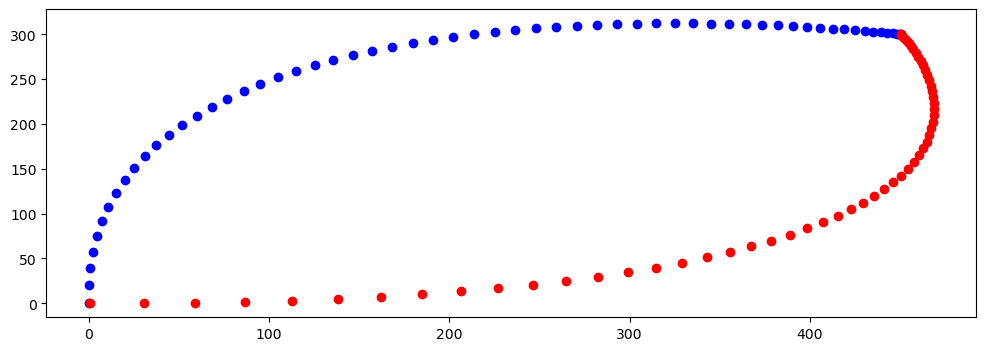

In [22]:
a_opt = value.(x_a)
p_opt = value.(x_p)
# plot the solution against the checkpoints
using PyPlot
figure(figsize=(12,4))
plot( a_opt[1,:], a_opt[2,:], "b.", markersize=12 )
plot( p_opt[1,:], p_opt[2,:], "r.", markersize=12 )
# Only need this in vscode?
display(gcf())